In [1]:
import re
import pandas as pd

In [2]:
f = open("WhatsApp Chat with Friends1.txt","r",encoding = "utf-8")
data = f.read()


In [3]:
print(data)

3/17/20, 08:01 - Saqib created group "Friends"
3/17/20, 08:01 - You were added
7/13/21, 01:19 - Ubaid abbassi: <Media omitted>
7/13/21, 02:37 - Saqib: <Media omitted>
7/13/21, 02:39 - Saqib: 😂😂😂
7/13/21, 02:48 - Waqar pff: ❤️❤️❤️
7/13/21, 03:31 - Saqib: <Media omitted>
7/13/21, 03:32 - Saqib: Saddam Military commander and Intelligence chief
7/13/21, 03:45 - +92 341 5133735: <Media omitted>
7/13/21, 03:46 - +92 341 5133735: <Media omitted>
7/13/21, 03:47 - Saqib: Hahaha the churail reminds me of murree 😂 #dadu
7/13/21, 03:47 - +92 341 5133735: 😂😂😂
7/13/21, 03:48 - Saqib: Bahi plz send the video or share the link
7/13/21, 03:48 - +92 341 5133735: Bol ja ab us baat ko dadu abe maraaa ga tjy
7/13/21, 03:50 - Saqib: 😂😂😂 jb wo ae ga hum  ja chuky hu gay 😂😂😂
7/13/21, 03:50 - +92 341 5133735: Abe wo nhe yaad oorrr nn h parhiii h wo video
7/13/21, 03:50 - Saqib: Oho
7/13/21, 03:50 - Waqar pff: ❤️❤️❤️
7/13/21, 03:53 - +92 341 5133735: Waqara g ap kiun jaaag rhy ho btw🤔
7/13/21, 03:54 - Waqar pff

In [4]:
pattern = '\d{1,2}\/\d{1,2}\/\d{2,4},\s\d{1,2}:\d{1,2}\s?\w[pm|am]?\s-\s'
pattern_datetime = '\d{1,2}\/\d{1,2}\/\d{2,4},\s\d{1,2}:\d{1,2}\s?\w[pm|am]?'
am_pm_check = '\d{1,2}\/\d{1,2}\/\d{2,4},\s\d{1,2}:\d{1,2}\s?\w[pm|am]'

In [5]:
messages = re.split(pattern,data)[1:]
print(messages[:5])
print(len(messages))
print(type(messages))


['Saqib created group "Friends"\n', 'You were added\n', 'Ubaid abbassi: <Media omitted>\n', 'Saqib: <Media omitted>\n', 'Saqib: 😂😂😂\n']
2613
<class 'list'>


In [6]:
# checking which format time is
date_check = '18/09/2018, 15:02'
time_format = 24
time_matches = re.findall(am_pm_check,data)
#print(time_matches)
if time_matches:
    #print("12 hr format")
    time_format = 12
#else:
 #   print("24 hr format")

In [7]:
dates = re.findall(pattern_datetime,data)
print(dates[0:5])
print(len(dates))
print(type(dates))

['3/17/20, 08:01', '3/17/20, 08:01', '7/13/21, 01:19', '7/13/21, 02:37', '7/13/21, 02:39']
2613
<class 'list'>


In [8]:
df = pd.DataFrame({"user_messages":messages,"date_time":dates})
df.head(2)

,user_messages,date_time
0,"Saqib created group ""Friends""\n","3/17/20, 08:01"
1,You were added\n,"3/17/20, 08:01"


In [9]:
from datetime import datetime
m2 = '18/09/2018, 5:01 pm'
m3 = '18/09/2018, 1:01'
#12 hr to 24 hr format
in_time = datetime.strptime(m2, "%d/%m/%Y, %I:%M %p")
print(in_time)
# only 24hr format
out_time = datetime.strptime(m3, "%d/%m/%Y, %H:%M")
print(out_time)


2018-09-18 17:01:00
2018-09-18 01:01:00


In [10]:
# converting date into proper datetime format
if time_format == 12:
    #df["date_time"] = pd.to_datetime(df["date_time"],format = "%d/%m/%Y, %I:%M %p")
    df["date_time"] = pd.to_datetime(df["date_time"])
else:
    #df["date_time"] = pd.to_datetime(df["date_time"],format = "%d/%m/%Y, %H:%M")
    df["date_time"] = pd.to_datetime(df["date_time"])
df.rename(columns = {"date_time":"date_sent"} ,inplace = True)


In [11]:
df.head(10)

,user_messages,date_sent
0,"Saqib created group ""Friends""\n",2020-03-17 08:01:00
1,You were added\n,2020-03-17 08:01:00
2,Ubaid abbassi: <Media omitted>\n,2021-07-13 01:19:00
3,Saqib: <Media omitted>\n,2021-07-13 02:37:00
4,Saqib: 😂😂😂\n,2021-07-13 02:39:00
5,Waqar pff: ❤️❤️❤️\n,2021-07-13 02:48:00
6,Saqib: <Media omitted>\n,2021-07-13 03:31:00
7,Saqib: Saddam Military commander and Intellige...,2021-07-13 03:32:00
8,+92 341 5133735: <Media omitted>\n,2021-07-13 03:45:00
9,+92 341 5133735: <Media omitted>\n,2021-07-13 03:46:00


In [12]:
#separate users and messages
users =  []
messages = []
for message in df['user_messages']:
    splitted_message = message.split(':')
    #print(splitted_message)
    #print(len(splitted_message))
    if len(splitted_message) == 1:
        users.append("group_notification")
        messages.append(splitted_message[0])
    else:
        users.append(splitted_message[0])
        #messages.append(splitted_message[1:])
        #to avoid creating an array we join the list with " "
        message_without_list = "".join(splitted_message[1:])
        messages.append(message_without_list)

df['user'] = users
df['message'] = messages
df.drop(columns = ["user_messages"],inplace = True)

In [13]:
df.head(10)

,date_sent,user,message
0,2020-03-17 08:01:00,group_notification,"Saqib created group ""Friends""\n"
1,2020-03-17 08:01:00,group_notification,You were added\n
2,2021-07-13 01:19:00,Ubaid abbassi,<Media omitted>\n
3,2021-07-13 02:37:00,Saqib,<Media omitted>\n
4,2021-07-13 02:39:00,Saqib,😂😂😂\n
5,2021-07-13 02:48:00,Waqar pff,❤️❤️❤️\n
6,2021-07-13 03:31:00,Saqib,<Media omitted>\n
7,2021-07-13 03:32:00,Saqib,Saddam Military commander and Intelligence ch...
8,2021-07-13 03:45:00,+92 341 5133735,<Media omitted>\n
9,2021-07-13 03:46:00,+92 341 5133735,<Media omitted>\n


In [14]:
#extracting day,month,year,hours,minutes
df['year'] = df['date_sent'].dt.year
df['month'] = df['date_sent'].dt.month_name()
df['day'] = df['date_sent'].dt.day
df['hour'] = df['date_sent'].dt.hour
df['minute'] = df['date_sent'].dt.minute


In [15]:
df.head(10)

,date_sent,user,message,year,month,day,hour,minute
0,2020-03-17 08:01:00,group_notification,"Saqib created group ""Friends""\n",2020,March,17,8,1
1,2020-03-17 08:01:00,group_notification,You were added\n,2020,March,17,8,1
2,2021-07-13 01:19:00,Ubaid abbassi,<Media omitted>\n,2021,July,13,1,19
3,2021-07-13 02:37:00,Saqib,<Media omitted>\n,2021,July,13,2,37
4,2021-07-13 02:39:00,Saqib,😂😂😂\n,2021,July,13,2,39
5,2021-07-13 02:48:00,Waqar pff,❤️❤️❤️\n,2021,July,13,2,48
6,2021-07-13 03:31:00,Saqib,<Media omitted>\n,2021,July,13,3,31
7,2021-07-13 03:32:00,Saqib,Saddam Military commander and Intelligence ch...,2021,July,13,3,32
8,2021-07-13 03:45:00,+92 341 5133735,<Media omitted>\n,2021,July,13,3,45
9,2021-07-13 03:46:00,+92 341 5133735,<Media omitted>\n,2021,July,13,3,46


In [16]:
df[df["message"] == ' <Media omitted>\n']

,date_sent,user,message,year,month,day,hour,minute
2,2021-07-13 01:19:00,Ubaid abbassi,<Media omitted>\n,2021,July,13,1,19
3,2021-07-13 02:37:00,Saqib,<Media omitted>\n,2021,July,13,2,37
6,2021-07-13 03:31:00,Saqib,<Media omitted>\n,2021,July,13,3,31
8,2021-07-13 03:45:00,+92 341 5133735,<Media omitted>\n,2021,July,13,3,45
9,2021-07-13 03:46:00,+92 341 5133735,<Media omitted>\n,2021,July,13,3,46
...,...,...,...,...,...,...,...,...
2572,2021-10-03 20:00:00,Waqar pff,<Media omitted>\n,2021,October,3,20,0
2579,2021-10-05 12:13:00,Waqar pff,<Media omitted>\n,2021,October,5,12,13
2606,2021-10-05 18:43:00,+92 341 5133735,<Media omitted>\n,2021,October,5,18,43
2607,2021-10-06 03:41:00,Ch saad,<Media omitted>\n,2021,October,6,3,41


In [17]:
df["message"].head(20)

0                       Saqib created group "Friends"\n
1                                      You were added\n
2                                     <Media omitted>\n
3                                     <Media omitted>\n
4                                                 😂😂😂\n
5                                              ❤️❤️❤️\n
6                                     <Media omitted>\n
7      Saddam Military commander and Intelligence ch...
8                                     <Media omitted>\n
9                                     <Media omitted>\n
10     Hahaha the churail reminds me of murree 😂 #da...
11                                                😂😂😂\n
12          Bahi plz send the video or share the link\n
13        Bol ja ab us baat ko dadu abe maraaa ga tjy\n
14           😂😂😂 jb wo ae ga hum  ja chuky hu gay 😂😂😂\n
15      Abe wo nhe yaad oorrr nn h parhiii h wo video\n
16                                                Oho\n
17                                             ❤

In [18]:
df.iloc[2].message

' <Media omitted>\n'

In [19]:
# extracting number of links shared
urls_list = []
from urlextract import URLExtract
extractor = URLExtract()

for message in df["message"]:
    # this will return urls in a list otherwise it return and empty list
    #print(extractor.find_urls(message))
    urls_list.extend(extractor.find_urls(message))
print(urls_list)

['PakWheels.com']


In [20]:
df.message.tail()

2608      https//movie-recommender-saqib.herokuapp.com/\n
2609     Now I will not recommend movies my system wil...
2610                                    <Media omitted>\n
2611                                                 ❤️\n
2612     Yar Koi is group ki chat export kr k mjy send...
Name: message, dtype: object

In [21]:
extractor.find_urls("https://movie-recommender-saqib.herokuapp.com/")

['https://movie-recommender-saqib.herokuapp.com/']

In [22]:
# most busiest users in the group

df['user'].value_counts().head(6)

Waqar pff          697
Saqib              393
KzK 😉              352
+92 341 5133735    254
Ch saad            220
Ubaid abbassi      199
Name: user, dtype: int64

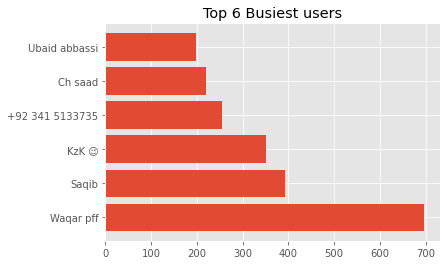

In [23]:
import matplotlib.pyplot as plt
x = df['user'].value_counts().head(6)
plt.style.use('ggplot')
name = x.index
count = x.values
plt.barh(name,count)
#plt.xticks(rotation = "vertical")
plt.title("Top 6 Busiest users")
plt.show()

In [24]:
# per user contribution in the group
# reset index convert the results into a dataframe
df2 = df[df["user"]!="group_notification"]
round( (df2["user"].value_counts()/df2.shape[0])*100 ,2).reset_index().rename(columns = {"index":"name","user":"percent"})

,name,percent
0,Waqar pff,26.72
1,Saqib,15.06
2,KzK 😉,13.49
3,+92 341 5133735,9.74
4,Ch saad,8.43
5,Ubaid abbassi,7.63
6,Hamza bari,5.17
7,Hashim Aslam,4.79
8,Zardari,4.10
9,Usama Shkt,3.91


In [25]:
# removing group message
temp = df[df['user']!="group_notification"]
# removing media omitted 
temp = temp[temp['message']!=' <Media omitted>\n']
# removing stopwords
f = open("../stopword_hinglish.txt",'r',encoding = "utf-8")
stop_words = f.read()
f = open("../stopwords-ur.txt",'r',encoding = "utf-8")
stop_words_ur = f.read()
#print(stop_words_ur) 
#print(stopwords)
#print(type(stopwords))
words_without_stopwords = [] 
for message in temp['message']:
    for word in message.lower().split():
        
         if word not in stop_words and word not in stop_words_ur:
             words_without_stopwords.append(word)

# getting most 20 frequently used words
from collections import Counter
#print(Counter(words_without_stopwords).most_common(20))
df_most_common = pd.DataFrame(Counter(words_without_stopwords).most_common(40)).rename(columns = {0:'word',1:'frequency'})
df_most_common.head()




,word,frequency
0,😂😂😂,73
1,😂,59
2,sy,41
3,kia,38
4,bahi,30


In [26]:
if "aaj" in stop_words:
    print("dasda")

dasda


In [27]:
#counting what are the top emojis used
import emoji
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])
emojis_df = pd.DataFrame(Counter(emojis).most_common(len(emojis))).rename(columns = {0:"emoji",1:"count"}) 
emojis_df.head()


,emoji,count
0,😂,425
1,😁,48
2,🤣,47
3,❤,44
4,😃,16


In [28]:
df['month_num'] = df['date_sent'].dt.month
df.head()

,date_sent,user,message,year,month,day,hour,minute,month_num
0,2020-03-17 08:01:00,group_notification,"Saqib created group ""Friends""\n",2020,March,17,8,1,3
1,2020-03-17 08:01:00,group_notification,You were added\n,2020,March,17,8,1,3
2,2021-07-13 01:19:00,Ubaid abbassi,<Media omitted>\n,2021,July,13,1,19,7
3,2021-07-13 02:37:00,Saqib,<Media omitted>\n,2021,July,13,2,37,7
4,2021-07-13 02:39:00,Saqib,😂😂😂\n,2021,July,13,2,39,7


In [29]:
timeline = df.groupby(["year","month_num","month"]).count()["message"].reset_index()
timeline.head(2)

,year,month_num,month,message
0,2020,3,March,2
1,2021,7,July,1267


In [30]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))


In [31]:
timeline['time'] = time 

In [32]:
timeline.head(2)

,year,month_num,month,message,time
0,2020,3,March,2,March-2020
1,2021,7,July,1267,July-2021


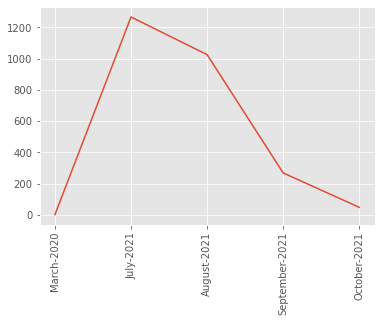

In [33]:
plt.plot(timeline["time"],timeline["message"])
plt.xticks(rotation = "vertical")
plt.show()

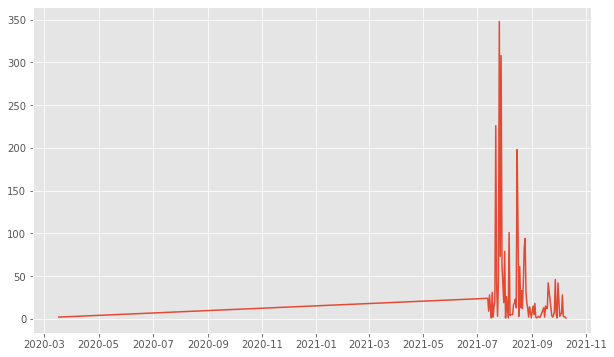

In [34]:
#no. of messages daily  sent
df['only_date'] = df['date_sent'].dt.date
daily_timeline = df.groupby(["only_date"]).count()["message"].reset_index()
plt.figure(figsize = (10,6))
plt.plot(daily_timeline["only_date"],daily_timeline["message"])


In [35]:
df['day_name'] = df['date_sent'].dt.day_name()
df['day_name'].value_counts()

Monday       603
Sunday       475
Wednesday    464
Thursday     444
Tuesday      291
Friday       244
Saturday      92
Name: day_name, dtype: int64

In [36]:
df[['hour','minute']]

,hour,minute
0,8,1
1,8,1
2,1,19
3,2,37
4,2,39
...,...,...
2608,10,39
2609,10,39
2610,2,15
2611,2,26


In [37]:
period = []
for hour in df[['hour','minute']]['hour']:
    #print(hour)
    if hour == 23:
        period.append(str(hour)+"-"+str("00"))
    elif hour==0:
        period.append(str('00')+"-"+str(hour+1))
    else:
        period.append(str(hour)+"-"+str(hour+1))

df['period'] = period   


In [38]:
df.head(2)

,date_sent,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
0,2020-03-17 08:01:00,group_notification,"Saqib created group ""Friends""\n",2020,March,17,8,1,3,2020-03-17,Tuesday,8-9
1,2020-03-17 08:01:00,group_notification,You were added\n,2020,March,17,8,1,3,2020-03-17,Tuesday,8-9


In [42]:
import seaborn as sns
pivot_table = df.pivot_table(index = "day_name",columns = "period",values = "message",aggfunc = "count").fillna(0)
pivot_table.head()

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,21-22,22-23,23-00,3-4,4-5,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,0.0,1.0,1.0,3.0,38.0,2.0,1.0,7.0,7.0,10.0,...,4.0,13.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Monday,111.0,53.0,3.0,2.0,35.0,9.0,3.0,34.0,7.0,19.0,...,13.0,51.0,191.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
Saturday,7.0,0.0,0.0,6.0,3.0,1.0,5.0,8.0,4.0,1.0,...,0.0,17.0,9.0,5.0,2.0,1.0,0.0,0.0,7.0,1.0
Sunday,2.0,4.0,0.0,1.0,5.0,106.0,15.0,21.0,17.0,16.0,...,24.0,71.0,83.0,0.0,0.0,2.0,2.0,2.0,0.0,1.0
Thursday,8.0,26.0,3.0,4.0,5.0,20.0,56.0,20.0,11.0,3.0,...,40.0,9.0,13.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0


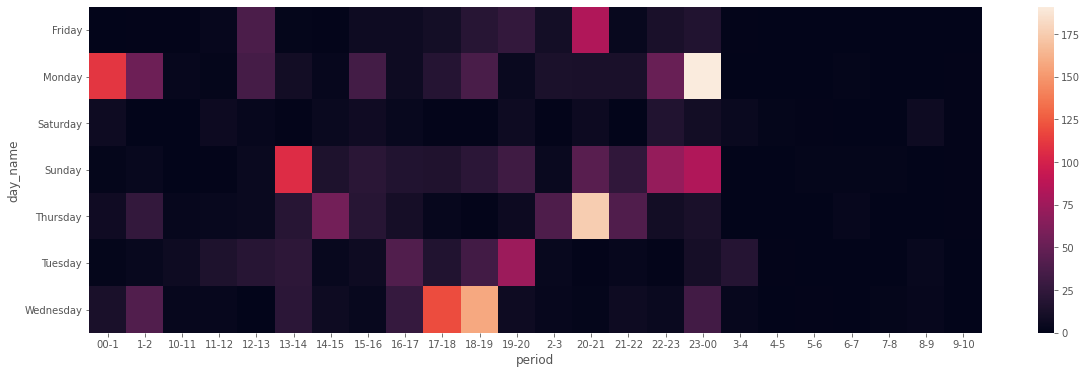

In [46]:
plt.figure(figsize = (20,6))
sns.heatmap(pivot_table)
plt.yticks(rotation = "horizontal")
#plt.xticks(rotation = "horizontal")
plt.show()